<a href="https://colab.research.google.com/github/log-runner/comp0197-cw2/blob/main/Data_processing_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/UCL/Advanced Deep Learning/ADL_Group/images

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/UCL/Advanced Deep Learning/ADL_Group/images


In [4]:
from PIL import Image
import numpy as np
import os

# Define input and output directories
input_dir = '/content/drive/MyDrive/UCL/Advanced Deep Learning/ADL_Group/images_test'
output_dir = '/content/drive/MyDrive/UCL/Advanced Deep Learning/ADL_Group/images_pre_processing'

# Define target image size for UNet input
target_size = (256, 256)

# Iterate over images in input directory
for file_name in os.listdir(input_dir):
    # Load image using Pillow
    img = Image.open(os.path.join(file_name))
    # Resize image to target size
    img = img.resize(target_size)
    # Convert image to numpy array
    img_arr = np.asarray(img, dtype=np.float32)
    # Normalize pixel values to [0, 1]
    img_arr /= 255.0
    # Save numpy array to output directory
    np.save(os.path.join(output_dir, file_name.split('.')[0]), img_arr)

In [11]:
import matplotlib.pyplot as plt
import cv2
import random


In [5]:
from PIL import Image
import numpy as np
import os

# Define input and output directories
input_dir = '/content/drive/MyDrive/UCL/Advanced Deep Learning/ADL_Group/images_test'
output_dir = '/content/drive/MyDrive/UCL/Advanced Deep Learning/ADL_Group/images_pre_processing'

# Define target image size for UNet input
target_size = (256, 256)

# Iterate over images in input directory
for file_name in os.listdir(input_dir):
    # Load image using Pillow
    img = Image.open(os.path.join(file_name))
    # Print initial size of image
    print(f'Initial size of {file_name}: {img.size}')
    # Resize image to target size
    img = img.resize(target_size)
    # Print final size of image
    print(f'Final size of {file_name}: {img.size}')
    # Convert image to numpy array
    img_arr = np.asarray(img, dtype=np.float32)
    # Normalize pixel values to [0, 1]
    img_arr /= 255.0
    # Save numpy array to output directory
    np.save(os.path.join(output_dir, file_name.split('.')[0]), img_arr)
    # Save image in JPEG format to output directory
    img.save(os.path.join(output_dir, file_name.split('.')[0] + '.jpg'))

Initial size of yorkshire_terrier_2.jpg: (334, 500)
Final size of yorkshire_terrier_2.jpg: (256, 256)
Initial size of yorkshire_terrier_90.jpg: (333, 500)
Final size of yorkshire_terrier_90.jpg: (256, 256)
Initial size of wheaten_terrier_104.jpg: (500, 357)
Final size of wheaten_terrier_104.jpg: (256, 256)


https://github.com/albumentations-team/albumentations_examples/blob/master/notebooks/pytorch_semantic_segmentation.ipynb

In [8]:
def preprocess_mask(mask):
    mask = mask.astype(np.float32)
    mask[mask == 2.0] = 0.0
    mask[(mask == 1.0) | (mask == 3.0)] = 1.0
    return mask

Perform binary split of annotations

In [17]:
def display_image_grid(images_filenames, images_directory, masks_directory, predicted_masks=None):
    cols = 3 if predicted_masks else 2
    rows = len(images_filenames)
    print('cols=',cols)
    print('rows=',rows)
    figure, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(10, 24))
    for i, image_filename in enumerate(images_filenames):
        image = cv2.imread(os.path.join(images_directory, image_filename))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        mask = cv2.imread(os.path.join(masks_directory, image_filename.replace(".jpg", ".png")), cv2.IMREAD_UNCHANGED,)
        mask = preprocess_mask(mask)
        ax[i, 0].imshow(image)
        ax[i, 1].imshow(mask, interpolation="nearest")

        ax[i, 0].set_title("Image")
        ax[i, 1].set_title("Ground truth mask")

        ax[i, 0].set_axis_off()
        ax[i, 1].set_axis_off()

        if predicted_masks:
            predicted_mask = predicted_masks[i]
            ax[i, 2].imshow(predicted_mask, interpolation="nearest")
            ax[i, 2].set_title("Predicted mask")
            ax[i, 2].set_axis_off()
    plt.tight_layout()
    plt.show()

In [18]:
root_directory = os.path.join('/content/drive/MyDrive/UCL/Advanced Deep Learning/ADL_Group/')
images_directory = os.path.join(root_directory, "images_small")
masks_directory = os.path.join(root_directory, "annotations_small", "trimaps")

Split data into train, validation and test set

In [19]:
images_filenames = list(sorted(os.listdir(images_directory)))
correct_images_filenames = [i for i in images_filenames if cv2.imread(os.path.join(images_directory, i)) is not None]

random.seed(42)
random.shuffle(correct_images_filenames)

train_images_filenames = correct_images_filenames[:4]
val_images_filenames = correct_images_filenames[4:5]
test_images_filenames = images_filenames[5:]

print(len(train_images_filenames), len(val_images_filenames), len(test_images_filenames))

4 1 1


cols= 2
rows= 4


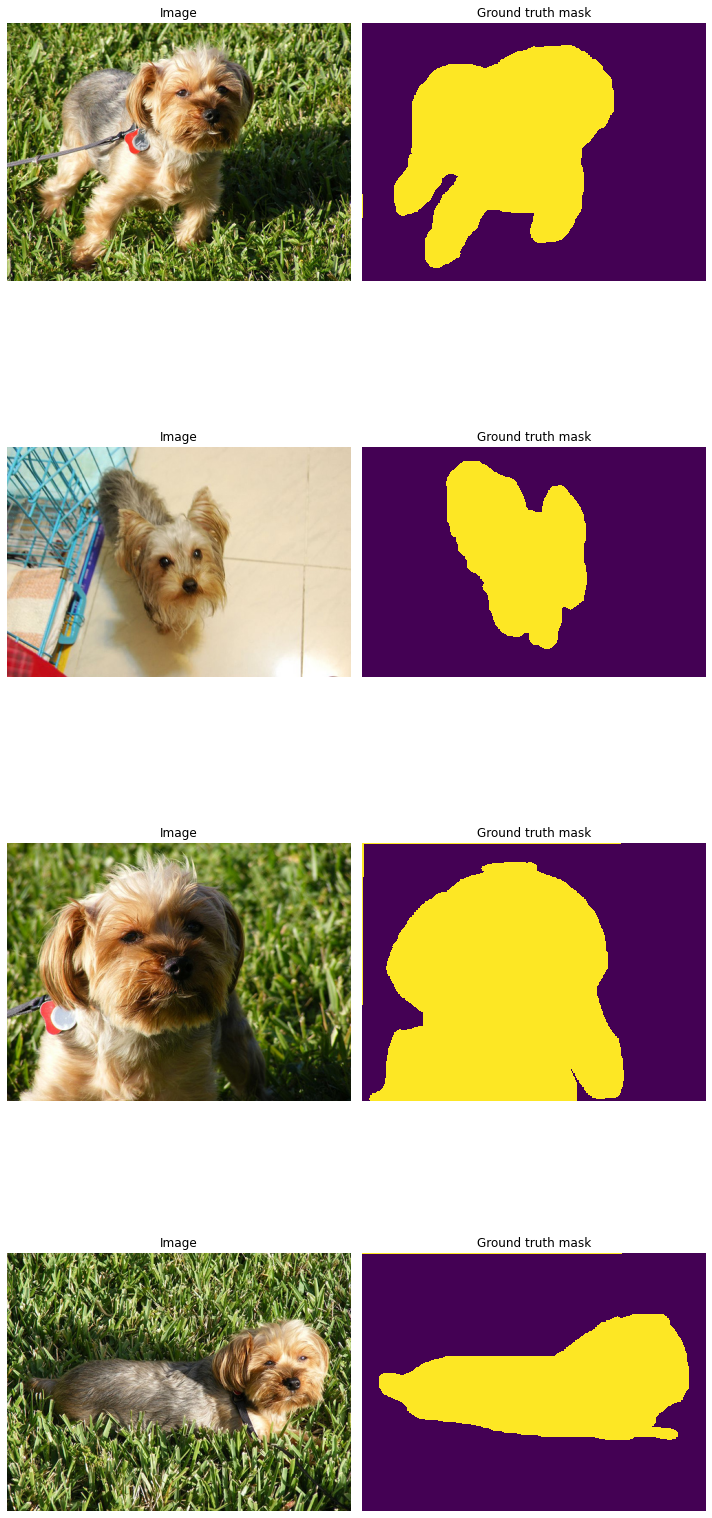

In [21]:
display_image_grid(train_images_filenames, images_directory, masks_directory)